In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [8]:
data = pd.read_csv('StereoMatch.txt')
data.shape

(84, 22)

In [9]:
data.head()

,class_1,confidence_1,x_loc_1,y_loc_1,width_1,height_1,h0_1,h1_1,h2_1,sat_1,...,confidence_2,x_loc_2,y_loc_2,width_2,height_2,h0_2,h1_2,h2_2,sat_2,val_2
0,2,1.0,566.0,215.5,52.0,137.0,0.315,0.437,0.247,71.996,...,1.0,530.5,216.0,49.0,134.0,0.291,0.468,0.242,72.229,121.822
1,2,1.0,519.0,253.5,106.0,229.0,0.409,0.372,0.220,58.709,...,1.0,456.0,251.0,102.0,232.0,0.365,0.477,0.158,64.661,160.096
2,1,1.0,217.0,228.0,170.0,74.0,0.169,0.673,0.159,81.929,...,1.0,197.0,227.0,178.0,74.0,0.171,0.671,0.159,76.289,67.717
3,1,1.0,194.0,230.5,184.0,79.0,0.173,0.664,0.163,81.141,...,1.0,172.5,230.5,191.0,77.0,0.160,0.678,0.161,75.939,69.946
4,2,1.0,1155.5,241.0,89.0,150.0,0.074,0.669,0.256,85.880,...,1.0,1110.0,242.0,94.0,152.0,0.094,0.682,0.224,82.096,58.026


In [10]:
data['dConfidence'] = data['confidence_1']-data['confidence_2']
data['dX'] = data['x_loc_1']-data['x_loc_2']
data['dY'] = data['y_loc_1']-data['y_loc_2']
data['dWidth'] = data['width_1']-data['width_2']
data['dHeight'] = data['height_1']-data['height_2']
data['dHue0'] = data['h0_1']-data['h0_2']
data['dHue1'] = data['h1_1']-data['h1_2']
data['dHue2'] = data['h2_1']-data['h2_2']
data['dSaturation'] = data['sat_1']-data['sat_2']
data['dValue'] = data['val_1']-data['val_2']

In [11]:
data.head()

,class_1,confidence_1,x_loc_1,y_loc_1,width_1,height_1,h0_1,h1_1,h2_1,sat_1,...,dConfidence,dX,dY,dWidth,dHeight,dHue0,dHue1,dHue2,dSaturation,dValue
0,2,1.0,566.0,215.5,52.0,137.0,0.315,0.437,0.247,71.996,...,0.0,35.5,-0.5,3.0,3.0,0.024,-0.031,0.005,-0.233,3.021
1,2,1.0,519.0,253.5,106.0,229.0,0.409,0.372,0.220,58.709,...,0.0,63.0,2.5,4.0,-3.0,0.044,-0.105,0.062,-5.952,-14.831
2,1,1.0,217.0,228.0,170.0,74.0,0.169,0.673,0.159,81.929,...,0.0,20.0,1.0,-8.0,0.0,-0.002,0.002,0.000,5.640,2.706
3,1,1.0,194.0,230.5,184.0,79.0,0.173,0.664,0.163,81.141,...,0.0,21.5,0.0,-7.0,2.0,0.013,-0.014,0.002,5.202,0.772
4,2,1.0,1155.5,241.0,89.0,150.0,0.074,0.669,0.256,85.880,...,0.0,45.5,-1.0,-5.0,-2.0,-0.020,-0.013,0.032,3.784,0.364


In [12]:
df=data.copy()

In [13]:
df=df.drop(['class_1','confidence_1','x_loc_1','y_loc_1','width_1','height_1','h0_1','h1_1','h2_1','sat_1','val_1'],1)
df=df.drop(['class_2','confidence_2','x_loc_2','y_loc_2','width_2','height_2','h0_2','h1_2','h2_2','sat_2','val_2'],1)

In [14]:
df.head()

,dConfidence,dX,dY,dWidth,dHeight,dHue0,dHue1,dHue2,dSaturation,dValue
0,0.0,35.5,-0.5,3.0,3.0,0.024,-0.031,0.005,-0.233,3.021
1,0.0,63.0,2.5,4.0,-3.0,0.044,-0.105,0.062,-5.952,-14.831
2,0.0,20.0,1.0,-8.0,0.0,-0.002,0.002,0.000,5.640,2.706
3,0.0,21.5,0.0,-7.0,2.0,0.013,-0.014,0.002,5.202,0.772
4,0.0,45.5,-1.0,-5.0,-2.0,-0.020,-0.013,0.032,3.784,0.364


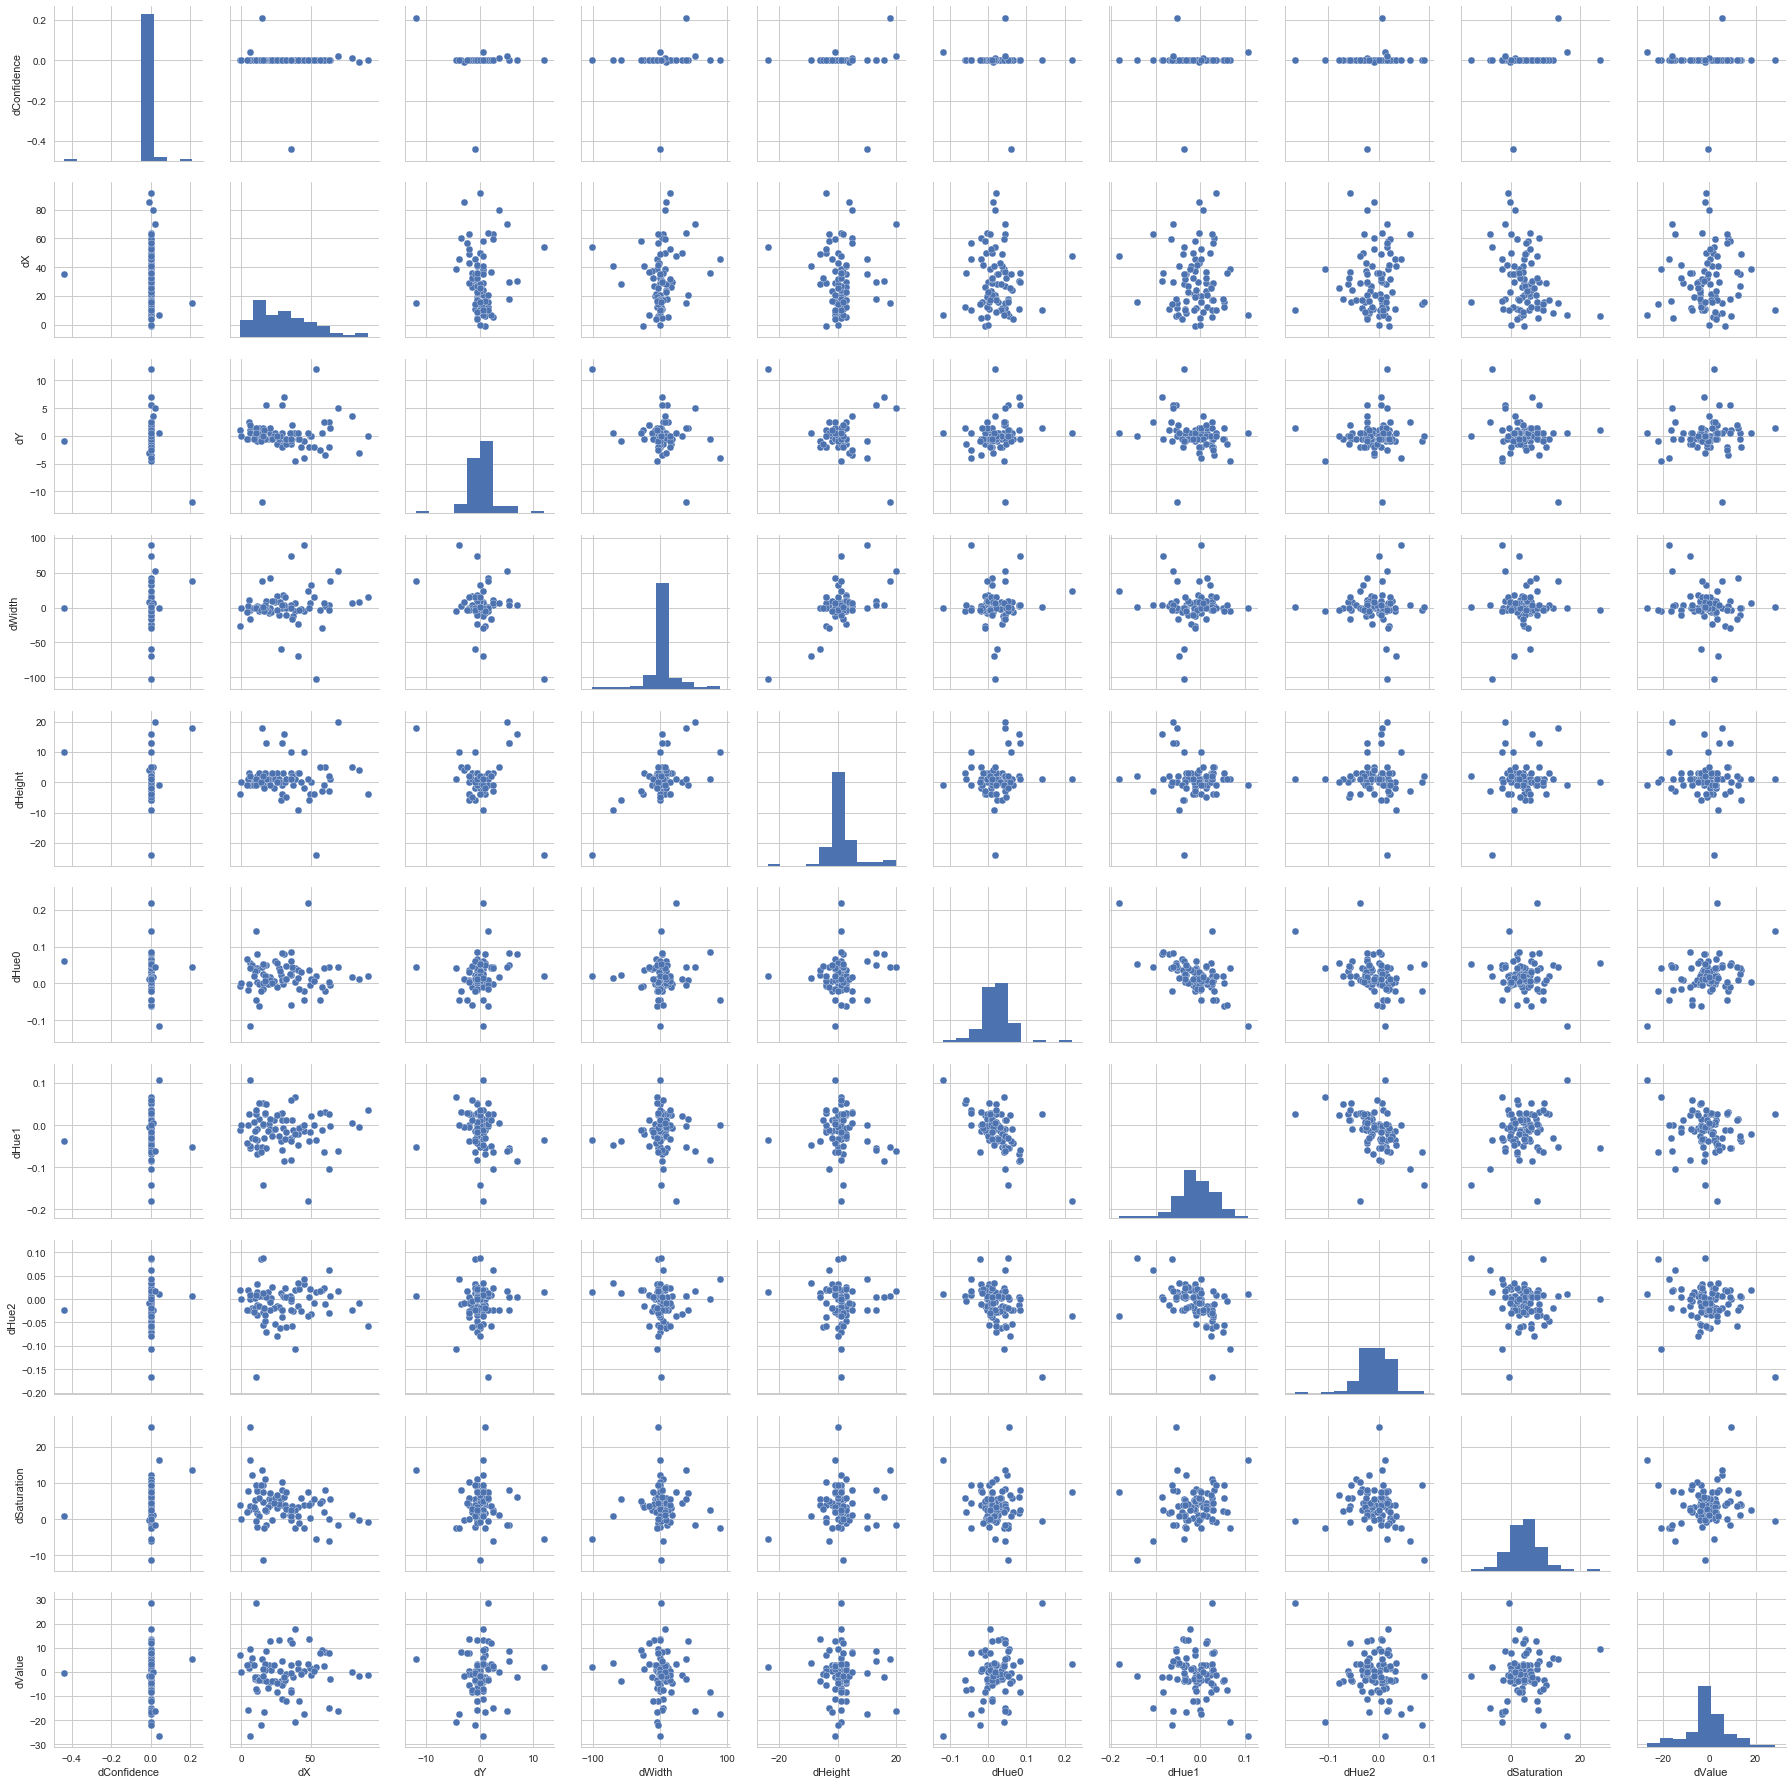

In [15]:
sns.pairplot(df)

In [16]:
covariance=df.cov()

In [17]:
covariance

,dConfidence,dX,dY,dWidth,dHeight,dHue0,dHue1,dHue2,dSaturation,dValue
dConfidence,0.002886,-0.069214,-0.022539,0.116641,-0.000818,-0.000207,0.000077,0.000131,0.046382,-0.003060
dX,-0.069214,411.545898,1.482788,53.121056,-1.707401,0.007306,-0.041094,0.034841,-31.935069,5.324796
dY,-0.022539,1.482788,6.991394,-20.158348,-2.624785,0.019775,-0.025219,0.005289,-2.481722,2.036318
dWidth,0.116641,53.121056,-20.158348,559.761905,75.860585,0.054818,-0.032215,-0.022245,4.598916,-36.784720
dHeight,-0.000818,-1.707401,-2.624785,75.860585,30.356282,0.030632,-0.030119,-0.000337,2.336329,-2.746706
dHue0,-0.000207,0.007306,0.019775,0.054818,0.030632,0.001820,-0.001190,-0.000622,-0.019008,0.125514
dHue1,0.000077,-0.041094,-0.025219,-0.032215,-0.030119,-0.001190,0.001925,-0.000741,0.040519,-0.041532
dHue2,0.000131,0.034841,0.005289,-0.022245,-0.000337,-0.000622,-0.000741,0.001361,-0.021563,-0.083944
dSaturation,0.046382,-31.935069,-2.481722,4.598916,2.336329,-0.019008,0.040519,-0.021563,24.449793,2.102903
dValue,-0.003060,5.324796,2.036318,-36.784720,-2.746706,0.125514,-0.041532,-0.083944,2.102903,78.502261


In [18]:
df.describe()

,dConfidence,dX,dY,dWidth,dHeight,dHue0,dHue1,dHue2,dSaturation,dValue
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,-0.002024,30.119048,0.142857,1.595238,1.071429,0.020762,-0.012524,-0.008333,3.859619,-1.029405
std,0.053724,20.286594,2.644124,23.659288,5.509654,0.042662,0.043879,0.036886,4.944673,8.860150
min,-0.440000,-1.000000,-12.000000,-102.000000,-24.000000,-0.117000,-0.181000,-0.166000,-11.327000,-26.690000
25%,0.000000,14.875000,-0.500000,-3.250000,-1.000000,-0.001250,-0.035250,-0.024500,1.041750,-3.944250
50%,0.000000,27.500000,0.000000,0.000000,1.000000,0.018500,-0.010000,-0.002000,3.741000,-1.281000
75%,0.000000,41.125000,0.625000,7.000000,2.250000,0.043000,0.014250,0.014250,5.875000,3.061000
max,0.210000,91.500000,12.000000,89.000000,20.000000,0.219000,0.106000,0.089000,25.595000,28.532000


In [19]:
mean = df.mean()

In [20]:
mean

dConfidence    -0.002024
dX             30.119048
dY              0.142857
dWidth          1.595238
dHeight         1.071429
dHue0           0.020762
dHue1          -0.012524
dHue2          -0.008333
dSaturation     3.859619
dValue         -1.029405
dtype: float64

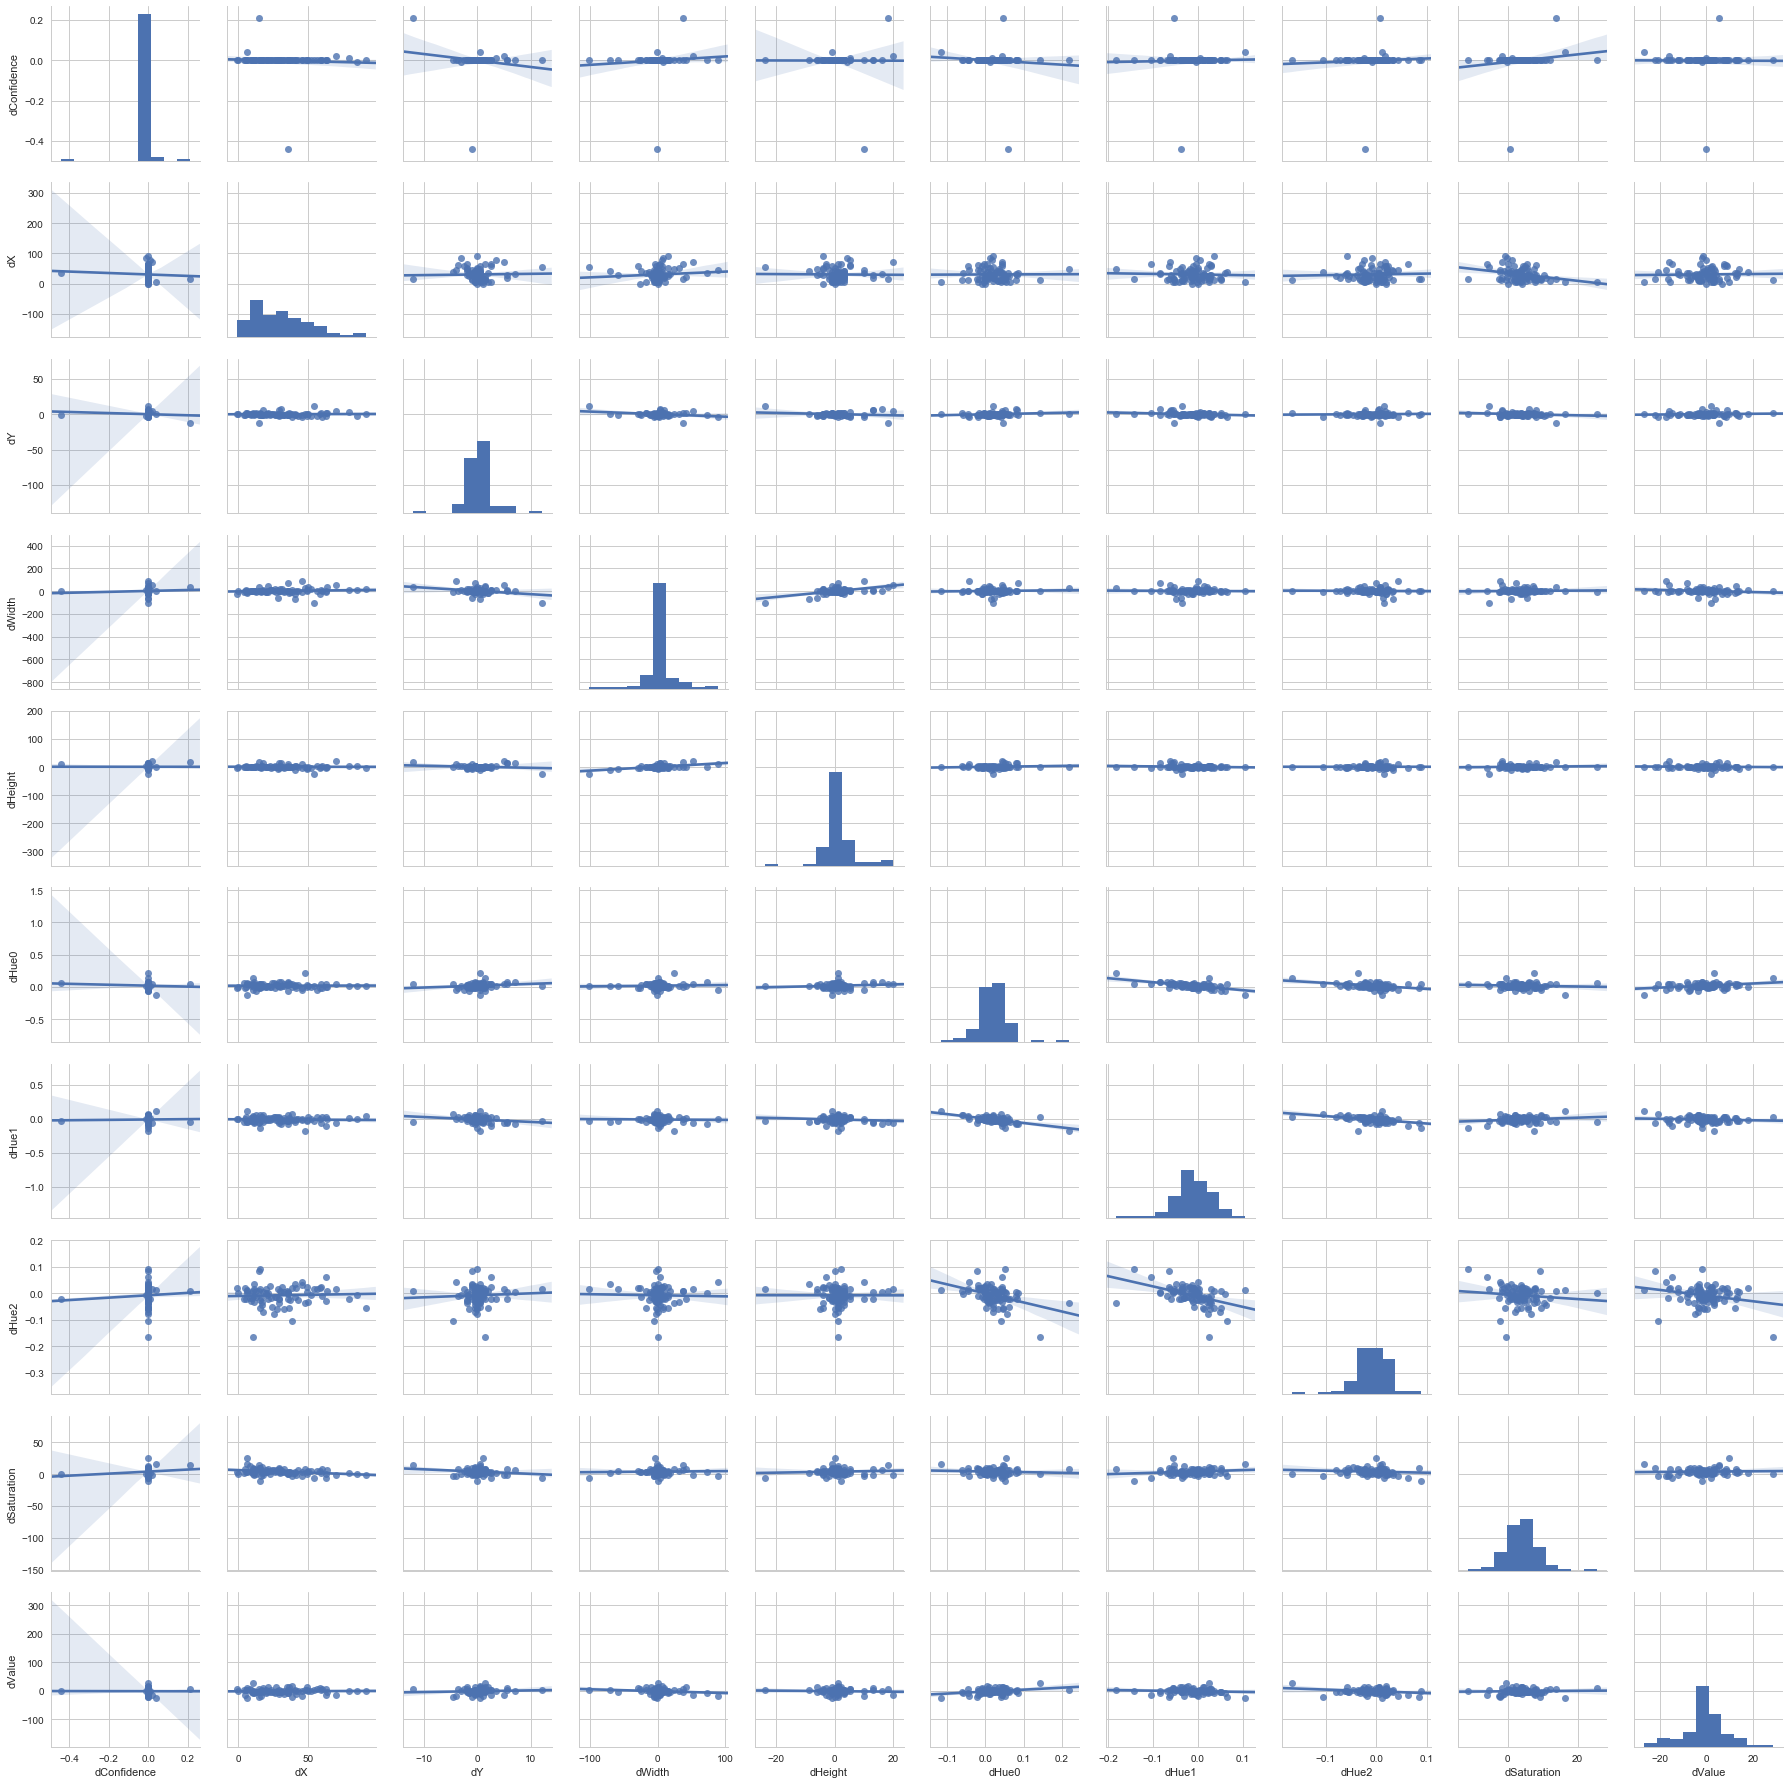

In [23]:
sns.pairplot(df, kind="reg")

In [26]:
mean.to_pickle("stereomatch_mean.pkl")
covariance.to_pickle("stereomatch_covariance.pkl")

In [29]:
mean_np = mean.as_matrix()
covariance_np = covariance.as_matrix()

In [30]:
mean_np

array([ -2.02380952e-03,   3.01190476e+01,   1.42857143e-01,
         1.59523810e+00,   1.07142857e+00,   2.07619048e-02,
        -1.25238095e-02,  -8.33333333e-03,   3.85961905e+00,
        -1.02940476e+00])

In [31]:
covariance_np

array([[  2.88621629e-03,  -6.92139989e-02,  -2.25387263e-02,
          1.16640849e-01,  -8.17555938e-04,  -2.06873207e-04,
          7.65174986e-05,   1.30642570e-04,   4.63818703e-02,
         -3.06034710e-03],
       [ -6.92139989e-02,   4.11545898e+02,   1.48278830e+00,
          5.31210557e+01,  -1.70740103e+00,   7.30579461e-03,
         -4.10935169e-02,   3.48413655e-02,  -3.19350686e+01,
          5.32479575e+00],
       [ -2.25387263e-02,   1.48278830e+00,   6.99139415e+00,
         -2.01583477e+01,  -2.62478485e+00,   1.97753873e-02,
         -2.52194492e-02,   5.28915663e-03,  -2.48172203e+00,
          2.03631756e+00],
       [  1.16640849e-01,   5.31210557e+01,  -2.01583477e+01,
          5.59761905e+02,   7.58605852e+01,   5.48181297e-02,
         -3.22145726e-02,  -2.22449799e-02,   4.59891624e+00,
         -3.67847200e+01],
       [ -8.17555938e-04,  -1.70740103e+00,  -2.62478485e+00,
          7.58605852e+01,   3.03562823e+01,   3.06316695e-02,
         -3.01187608e-02

In [32]:
feature_diffs_np = df.as_matrix()
feature_diffs_np

array([[  0.00000000e+00,   3.55000000e+01,  -5.00000000e-01,
          3.00000000e+00,   3.00000000e+00,   2.40000000e-02,
         -3.10000000e-02,   5.00000000e-03,  -2.33000000e-01,
          3.02100000e+00],
       [  0.00000000e+00,   6.30000000e+01,   2.50000000e+00,
          4.00000000e+00,  -3.00000000e+00,   4.40000000e-02,
         -1.05000000e-01,   6.20000000e-02,  -5.95200000e+00,
         -1.48310000e+01],
       [  0.00000000e+00,   2.00000000e+01,   1.00000000e+00,
         -8.00000000e+00,   0.00000000e+00,  -2.00000000e-03,
          2.00000000e-03,   0.00000000e+00,   5.64000000e+00,
          2.70600000e+00],
       [  0.00000000e+00,   2.15000000e+01,   0.00000000e+00,
         -7.00000000e+00,   2.00000000e+00,   1.30000000e-02,
         -1.40000000e-02,   2.00000000e-03,   5.20200000e+00,
          7.72000000e-01],
       [  0.00000000e+00,   4.55000000e+01,  -1.00000000e+00,
         -5.00000000e+00,  -2.00000000e+00,  -2.00000000e-02,
         -1.30000000e-02

In [33]:
feature_diffs_np.shape

(84, 10)

In [38]:
import numpy.linalg as linalg
eig_val, eig_vec = linalg.eig(covariance_np)

In [39]:
print(eig_val)

[  5.89041409e+02   3.99646788e+02   7.58442329e+01   2.19568030e+01
   1.91744882e+01   5.94463322e+00   1.75965237e-03   2.78476787e-03
   2.62625355e-03   1.69800655e-07]


In [40]:
print(eig_vec)

[[  1.55441998e-04   2.56017546e-04   1.19518996e-04   1.51740418e-03
   -1.54471860e-03  -2.01956847e-03   2.38120466e-01  -9.63184117e-01
    1.24764159e-01   1.85623745e-04]
 [  2.81621469e-01  -9.55177602e-01  -2.04203395e-02   8.89019019e-02
    7.55844726e-04   1.99103310e-03   1.17872327e-04  -5.68174047e-05
   -7.45268664e-05   1.96266902e-06]
 [ -3.28920118e-02  -1.87725614e-02   4.51467735e-03  -1.19154437e-01
    6.05931495e-02   9.90277075e-01   9.81287109e-05  -1.70684047e-03
    4.94014403e-03  -2.43922620e-05]
 [  9.47997040e-01   2.72205123e-01   6.83491315e-02  -6.24325287e-02
   -1.31443054e-01   3.68666812e-02  -2.67205488e-04   2.17241239e-04
    1.10620545e-04  -1.60559907e-06]
 [  1.28309882e-01   6.13540560e-02   5.76600378e-02   2.58374668e-01
    9.53518616e-01  -2.21033989e-02   2.40746893e-04  -7.40886471e-04
    1.78527880e-03   1.24237455e-06]
 [  8.34258926e-05   4.81889235e-06   1.70115957e-03  -1.08153619e-03
    1.27309776e-03   2.81045007e-03   5.53544

In [44]:
for i in range(len(eig_val)):
    eigvec = eig_vec[:,i].reshape(1,10).T

    print('Eigenvector {}: \n{}'.format(i+1, eigvec))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val[i]))
    print(40 * '-')

Eigenvector 1: 
[[  1.55441998e-04]
 [  2.81621469e-01]
 [ -3.28920118e-02]
 [  9.47997040e-01]
 [  1.28309882e-01]
 [  8.34258926e-05]
 [ -7.25115358e-05]
 [ -9.79022191e-06]
 [ -7.77852634e-03]
 [ -6.62201532e-02]]
Eigenvalue 1 from covariance matrix: 589.0414089958404
----------------------------------------
Eigenvector 2: 
[[  2.56017546e-04]
 [ -9.55177602e-01]
 [ -1.87725614e-02]
 [  2.72205123e-01]
 [  6.13540560e-02]
 [  4.81889235e-06]
 [  8.63361698e-05]
 [ -9.34103288e-05]
 [  8.48791534e-02]
 [ -4.71045442e-02]]
Eigenvalue 2 from covariance matrix: 399.64678760520087
----------------------------------------
Eigenvector 3: 
[[  1.19518996e-04]
 [ -2.04203395e-02]
 [  4.51467735e-03]
 [  6.83491315e-02]
 [  5.76600378e-02]
 [  1.70115957e-03]
 [ -5.53567033e-04]
 [ -1.14697186e-03]
 [  6.18725911e-02]
 [  9.93847874e-01]]
Eigenvalue 3 from covariance matrix: 75.84423288426943
----------------------------------------
Eigenvector 4: 
[[  1.51740418e-03]
 [  8.89019019e-02]
 [ -